In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(r'C:\Users\clozy\opencv\Scripts\jpnb\CREATING\clustering\1.0\Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop(['Gender', 'Age'], axis=1, inplace=True)
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [5]:
#shuffle data frac=1 ensures all original datapoints are preserved
data = data.sample(frac=1)

In [7]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
k_means.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0])

In [9]:
np.unique(k_means.labels_)

array([0, 1])

In [18]:
centers = k_means.cluster_centers_

centers

array([[ 50.5 ,  39.56,  49.93],
       [150.5 ,  81.56,  50.47]])

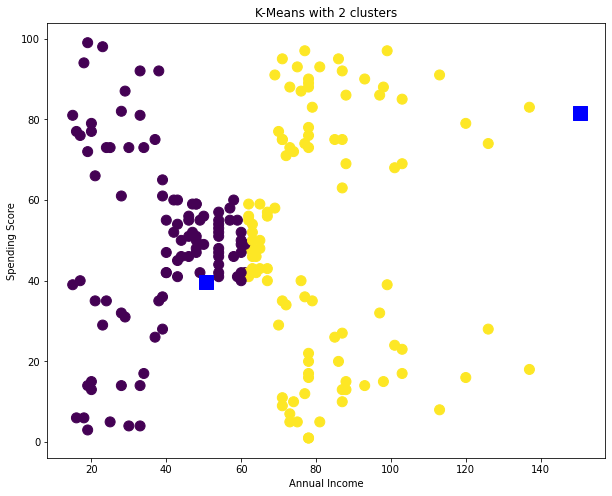

In [19]:
plt.figure(figsize=(10, 8))


plt.scatter(data['Annual Income (k$)'],
           data['Spending Score (1-100)'],
           c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [21]:
#silhouette score
from sklearn.metrics import silhouette_score

score = silhouette_score(data, k_means.labels_)

print('score =', score)

score = 0.5075884551795813


In [22]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4])

In [24]:
centers = k_means.cluster_centers_

centers

array([[ 96.05084746,  59.05084746,  48.84745763],
       [164.        ,  87.91666667,  17.88888889],
       [ 23.        ,  26.30434783,  20.91304348],
       [ 39.11627907,  34.48837209,  65.81395349],
       [162.        ,  86.53846154,  82.12820513]])

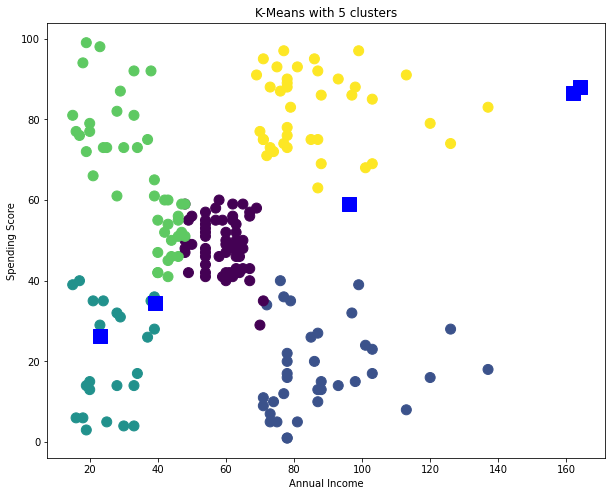

In [29]:
plt.figure(figsize=(10, 8))


plt.scatter(data['Annual Income (k$)'],
           data['Spending Score (1-100)'],
           c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 5 clusters')

plt.show()

In [30]:
score = silhouette_score(data, k_means.labels_)

print('Score =', score)

Score = 0.4646816720857312
